In [1]:
!pip install git+https://github.com/qgallouedec/Gym-Robotics.git@no_task

  Cloning https://github.com/qgallouedec/Gym-Robotics.git (to revision no_task) to /private/var/folders/z7/y_b89yb93892c6g3g2x8wk_h0000gn/T/pip-req-build-ch_iurfk
  Running command git clone -q https://github.com/qgallouedec/Gym-Robotics.git /private/var/folders/z7/y_b89yb93892c6g3g2x8wk_h0000gn/T/pip-req-build-ch_iurfk
  Running command git checkout -b no_task --track origin/no_task
  Switched to a new branch 'no_task'
  branch 'no_task' set up to track 'origin/no_task'.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 696 kB 2.5 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gym-robotics: filename=gym_robotics-0.1.0+12.ge78445b-py3-none-any.whl size=1454013 sha256=4692d8d6301fc83a494dec2f149dc0092f92b6007bcfd19bd912264e3b24a36d
  Stored in directory: /pri

In [2]:
import gym
import gym_robotics

env = gym.make("FetchNoTask-v1")

obs = env.reset()

for _ in range(50):
    env.step(env.action_space.sample())

Render last observation

Found 3 GPUs for rendering. Using device 0.


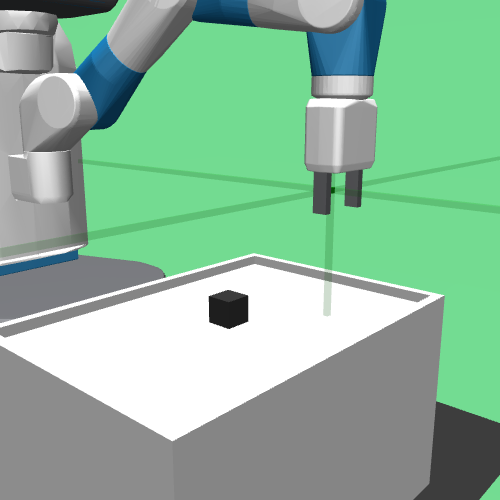

In [3]:
from PIL import Image

Image.fromarray(env.render("rgb_array"))

Close.

In [4]:
env.close()